In [1]:
quiet_library <- function(...) {
    suppressPackageStartupMessages(library(...))
}
quiet_library('tidyverse')
quiet_library("hise")
quiet_library('ArchR')
quiet_library('data.table')
quiet_library('jsonlite')
quiet_library('parallel')
quiet_library("Seurat")
quiet_library(H5weaver)
library(ggplot2)



                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .______      
          /   \     |   _ 

In [1]:
library(JASPAR2020)
library(TFBSTools )
tair.motif=getMatrixSet(x=JASPAR2020,opts=list(species="9606",matrixtype="PWM"))

In [2]:
tair.motif

PWMatrixList of length 633
names(633): MA0030.1 MA0031.1 MA0051.1 MA0057.1 ... MA0748.2 MA0528.2 MA0609.2

In [3]:
results_df <- data.frame(Motif_ID = character(), Motif_Name = character(), stringsAsFactors = FALSE)

for (i in seq_along(tair.motif@listData)) {
    Motif <- tair.motif@listData[[i]]
    Motif_ID <- Motif@ID
    Motif_Name <- Motif@name
    
    results_df <- rbind(results_df, data.frame(Motif_ID = Motif_ID, Motif_Name = Motif_Name, stringsAsFactors = FALSE))
}


In [59]:
results_df[grepl('GATA',results_df$Motif_Name),]

,Motif_ID,Motif_Name
,<chr>,<chr>
51,MA0140.2,GATA1::TAL1
298,MA0036.3,GATA2
325,MA0037.3,GATA3
493,MA0766.2,GATA5
577,MA0035.4,GATA1
578,MA0482.2,GATA4
579,MA1104.2,GATA6


In [33]:
meta<-read.csv('meta_data_GEO.csv')

In [34]:
projHeme3 <- loadArchRProject(path = 'PenSen_ATAC_Jasper2020/')

Successfully loaded ArchRProject!


                                                   / |
                                                 /    \
            .                                  /      |.
            \\\                              /        |.
              \\\                          /           `|.
                \\\                      /              |.
                  \                    /                |\
                  \\#####\           /                  ||
                ==###########>      /                   ||
                 \\##==......\    /                     ||
            ______ =       =|__ /__                     ||      \\\
        ,--' ,----`-,__ ___/'  --,-`-===================##========>
       \               '        ##_______ _____ ,--,__,=##,__   ///
        ,    __==    ___,-,__,--'#'  ==='      `-'    | ##,-/
        -,____,---'       \\####\\________________,--\\_##,/
           ___      .______        ______  __    __  .____

In [36]:
getAvailableMatrices(ArchRProj = projHeme3)


[1] "GeneScoreMatrix" "MotifMatrix"     "PeakMatrix"      "TileMatrix"

In [38]:
MotifMatrix<-getMatrixFromProject(
  ArchRProj = projHeme3,
  useMatrix = "MotifMatrix",
  useSeqnames = NULL,
  verbose = TRUE,
  binarize = FALSE,
  threads = 60,
  logFile = createLogFile("getMatrixFromProject")
)


ArchR logging to : ArchRLogs/ArchR-getMatrixFromProject-15a7260c5041-Date-2024-04-09_Time-17-48-44.533092.log
If there is an issue, please report to github with logFile!

2024-04-09 17:49:10.17896 : Organizing colData, 0.427 mins elapsed.

2024-04-09 17:49:11.10711 : Organizing rowData, 0.443 mins elapsed.

2024-04-09 17:49:11.113608 : Organizing rowRanges, 0.443 mins elapsed.

2024-04-09 17:49:11.120832 : Organizing Assays (1 of 2), 0.443 mins elapsed.

2024-04-09 17:49:31.071115 : Organizing Assays (2 of 2), 0.776 mins elapsed.

2024-04-09 17:49:48.229698 : Constructing SummarizedExperiment, 1.062 mins elapsed.

2024-04-09 17:49:49.564135 : Finished Matrix Creation, 1.084 mins elapsed.



In [39]:
## get mean ChromVar Z Scores

for (sample in unique(MotifMatrix$Sample)){
print(sample)
MotifMatrix_subset<-MotifMatrix[,MotifMatrix$Sample==sample]
groups<-unique(MotifMatrix_subset$celltype) 
mean_df_list<-mclapply(groups, function(x){

MotifMatrix_subset_single_celltype<-MotifMatrix_subset[,MotifMatrix_subset$celltype==x]
mean_sinlge_celltype<-as.data.frame(rowMeans(assay(MotifMatrix_subset_single_celltype,'z')))
colnames(mean_sinlge_celltype)<-x
return(mean_sinlge_celltype)
},mc.cores=60)

mean_df<-do.call(cbind,mean_df_list)
write.csv(mean_df,paste0('ChromVar_Average_Score_Jasper2020/',sample,'.csv'))

}

[1] "GSM6611374_B076-P1_PB00127-02"
[1] "GSM6611366_B076-P1_PB00353-03"
[1] "GSM6611370_B076-P1_PB00599-02"
[1] "GSM6611371_B076-P1_PB00124-02"
[1] "GSM6611367_B076-P1_PB00334-03"
[1] "GSM6611368_B076-P1_PB00377-03"
[1] "GSM6611365_B076-P1_PB00368-04"
[1] "GSM6611369_B076-P1_PB00545-02"
[1] "GSM6611364_B069-P1_PB00323-02"
[1] "GSM6611377_B065-P1_PB00192-02"
[1] "GSM6611378_B065-P1_PB00197-02"
[1] "GSM6611375_B069-P1_PB00807-02"
[1] "GSM6611373_B069-P1_PB00182-02"
[1] "GSM6611376_B065-P1_PB00173-02"
[1] "GSM6611363_B065-P1_PB00593-04"
[1] "GSM6611372_B069-P1_PB00172-02"


In [40]:
df_list<-mclapply(meta$combined_sample_id,function(sample_id){


df<-read.csv(paste0('ChromVar_Average_Score_Jasper2020/',sample_id,'.csv'),check.names = FALSE)
colnames(df)[1]<-'Motif'
long_df <- as.data.frame(pivot_longer(df, cols = -Motif, names_to = "Variable", values_to = "Value"))
long_df$combined_sample_id<-sample_id
return(long_df)
})

In [41]:
df_all<-do.call(rbind,df_list)

In [42]:
df_all<-left_join(df_all,meta)

Joining with `by = join_by(combined_sample_id)`


In [50]:
GATA_Motif_Name<-unique(df_all$Motif[grepl('MA0037.3|MA0690.1',df_all$Motif)])

In [51]:
df_all_GATA<-df_all %>% filter(Motif %in%GATA_Motif_Name )

In [52]:
colnames(df_all_GATA)<-gsub('.ch1','',colnames(df_all_GATA))

In [53]:
df_all_GATA$cohorts<-substr(df_all_GATA$subject_id,1,3)

In [54]:
cd8_selected<-c('GZMK+ CD27+ EM CD8 T cell',
                'KLRF1+ GZMB+ CD27- EM CD8 T cell',
                'KLRF1- GZMB+ CD27- EM CD8 T cell',
                'Core naive CD8 T cell')

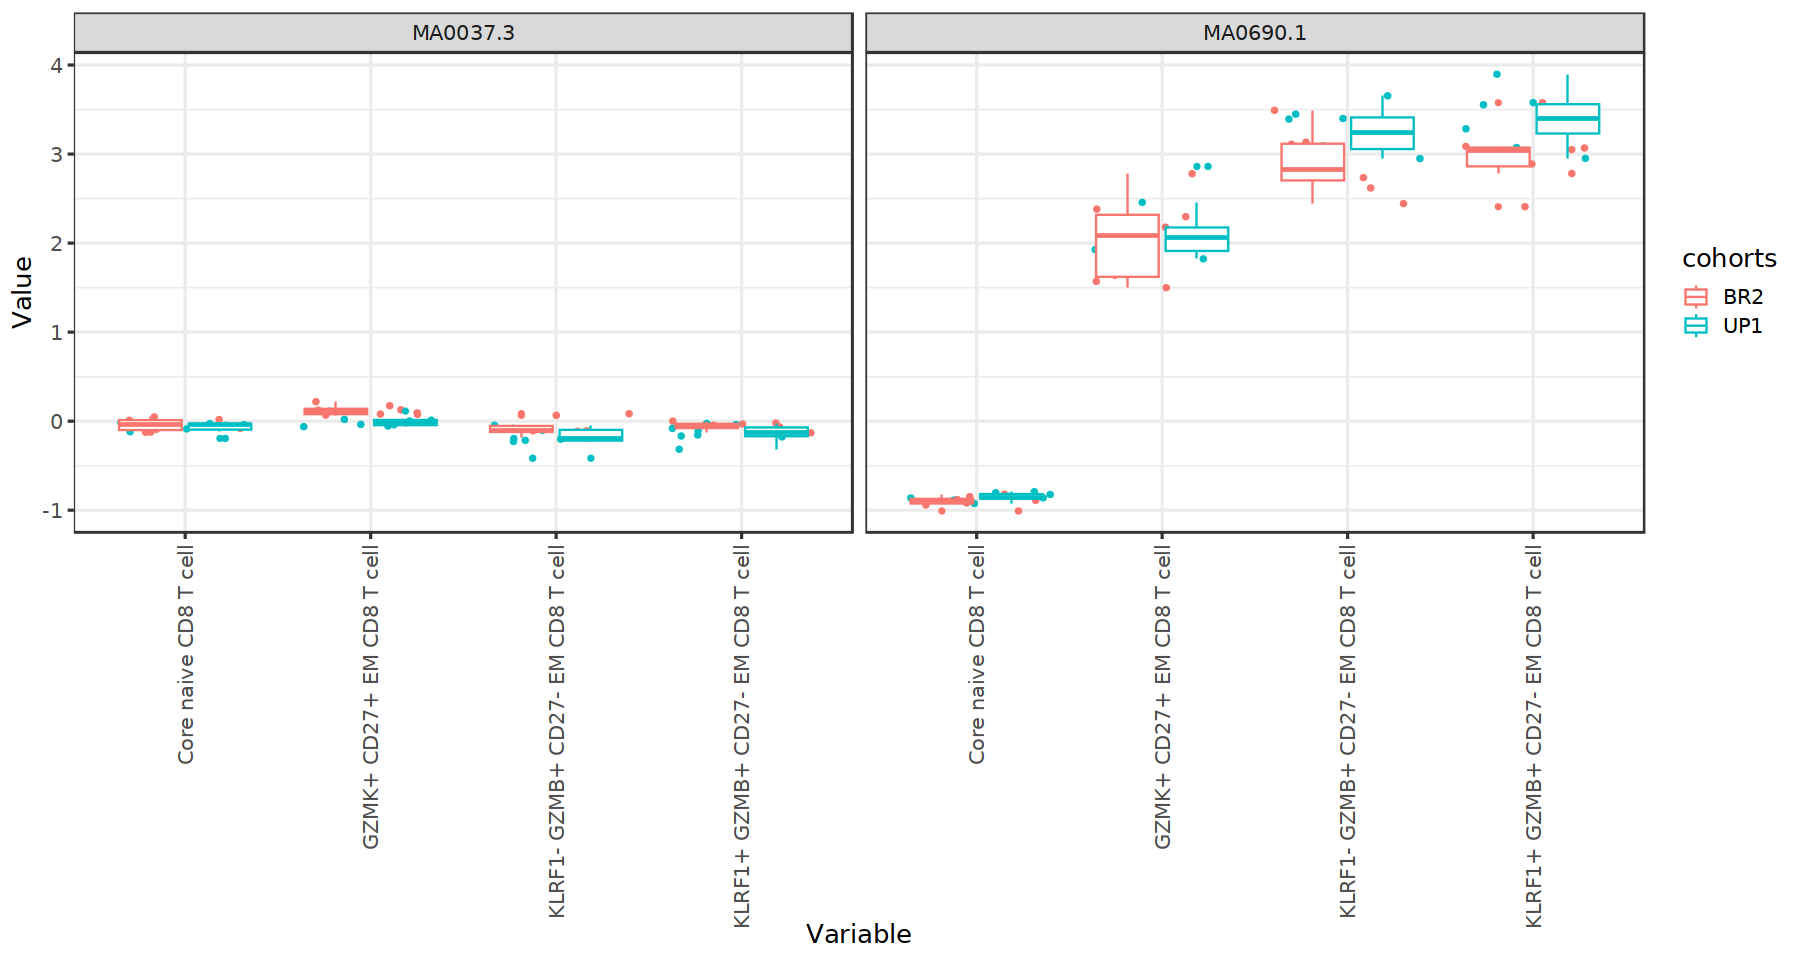

In [55]:
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(df_all_GATA %>% filter(Variable %in% cd8_selected), aes(x=Variable, y=Value,color=cohorts)) + geom_jitter(shape=16)+ 
  geom_boxplot(outlier.size=1)+facet_wrap(~Motif,ncol=3)+theme_bw(base_size=15)+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


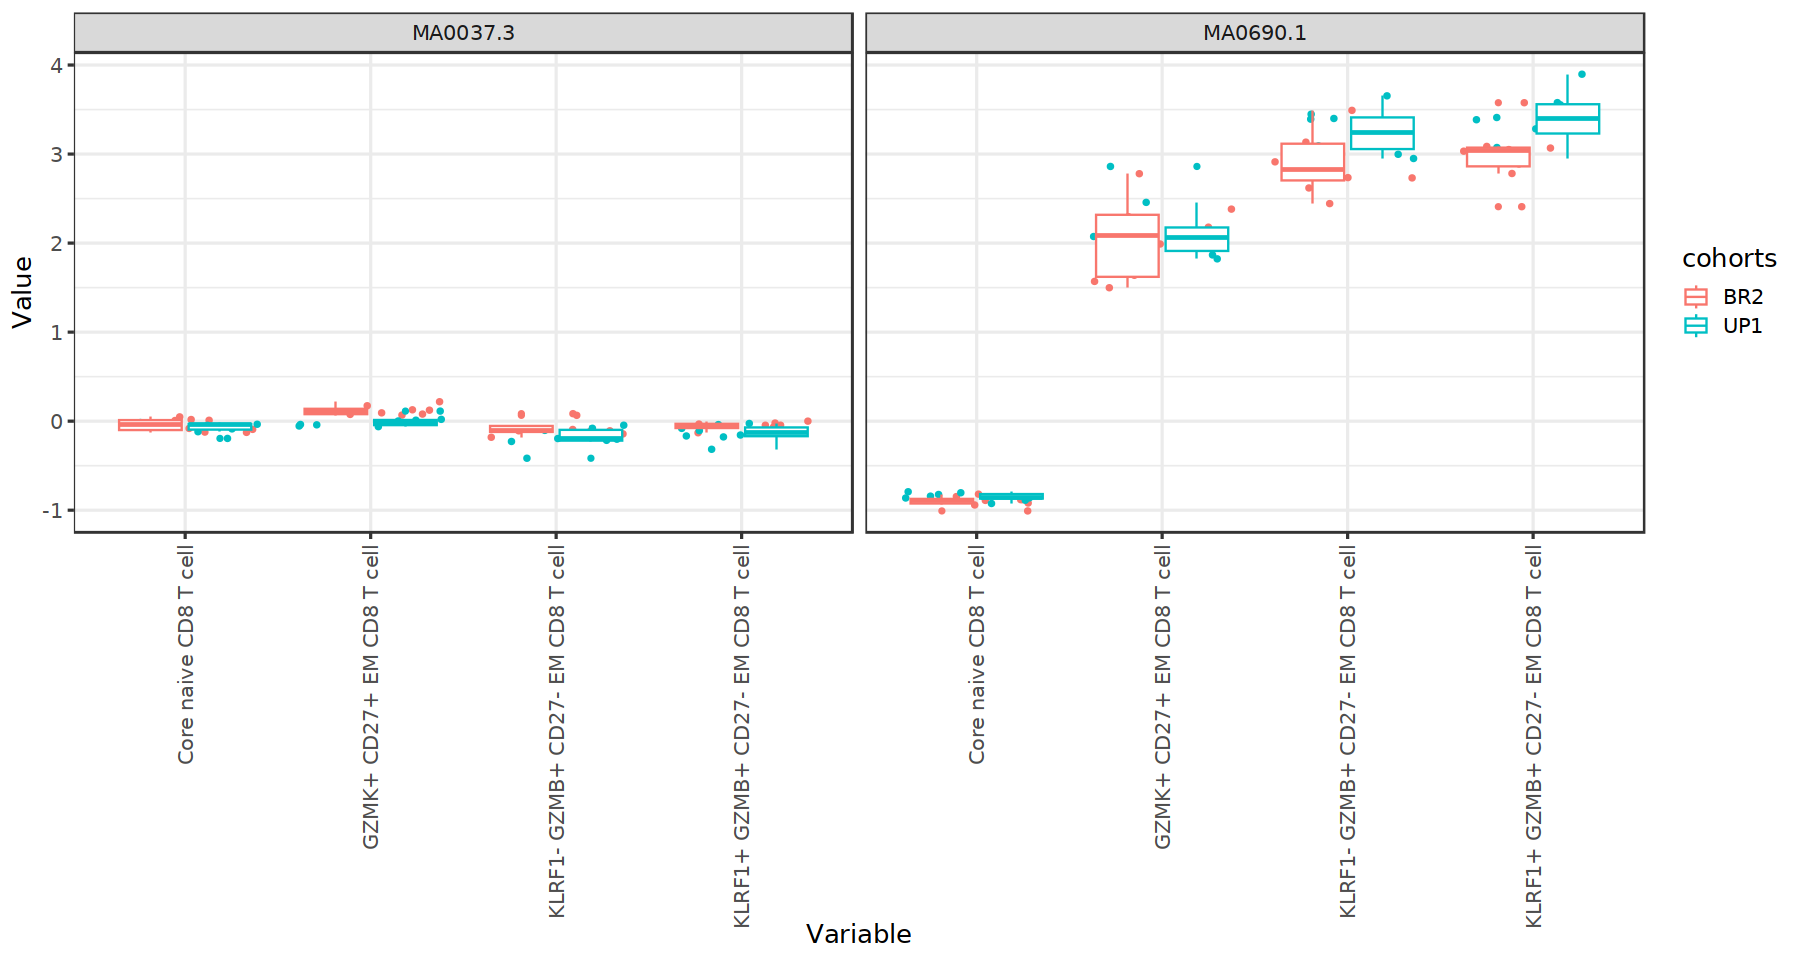

In [56]:
options(repr.plot.width = 15, repr.plot.height = 8)

ggplot(df_all_GATA %>% filter(Variable %in% cd8_selected), aes(x=Variable, y=Value,color=cohorts)) + geom_jitter(shape=16)+ 
  geom_boxplot(outlier.size=1)+facet_wrap(~Motif,ncol=3)+theme_bw(base_size=15)+ theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


In [ ]:
cd4_selected<-c('CM CD4 T cell',
                'Core naive CD4 T cell',
                'GZMB- CD27- EM CD4 T cell',
                'GZMB- CD27+ EM CD4 T cell',
                'KLRF1- GZMB+ CD27- memory CD4 T cell')

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)


ggplot(df_all_GATA %>% filter(Variable %in% cd4_selected), aes(x=Variable, y=Value,color=cohorts)) + geom_jitter(shape=16)+ 
  geom_boxplot(outlier.size=1)+facet_wrap(~Motif,ncol=3)+
theme_bw(base_size=15)+ 
theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))
